In [23]:
pip cache purge


Files removed: 0Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\yashk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


Training data shape: (60000, 28, 28), Labels shape: (60000,)
Testing data shape: (10000, 28, 28), Labels shape: (10000,)


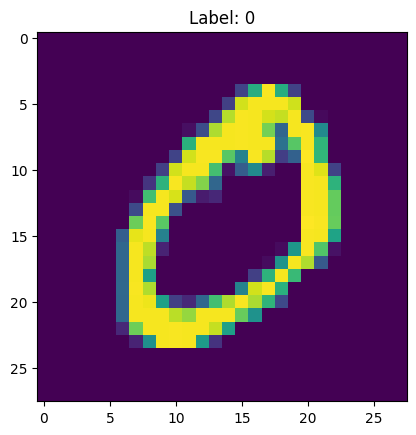

In [26]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape of the data
# Training/Test data shape : (number_of_samples, height, width)
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Labels shape: {y_test.shape}")

# Visualize a sample
plt.imshow(x_train[1])
plt.title(f"Label: {y_train[1]}")
plt.show()


In [27]:
# Normalize pixel values to the range [0, 1]
x_train = x_train/255.0
x_test = x_test/255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [28]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D vector
    Dense(128, activation='relu'), # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax') # Output layer for 10 classes
])


C:\Users\yashk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',   # or use gradient descent
    metrics=['accuracy']
)


In [30]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,  # Use 20% of the data for validation
    epochs=10,             # Train for 10 epochs
    batch_size=32          # Use batches of 32 samples
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8645 - loss: 0.4706 - val_accuracy: 0.9607 - val_loss: 0.1322
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9657 - loss: 0.1143 - val_accuracy: 0.9638 - val_loss: 0.1191
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9763 - loss: 0.0753 - val_accuracy: 0.9704 - val_loss: 0.1001
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9826 - loss: 0.0559 - val_accuracy: 0.9700 - val_loss: 0.0996
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9855 - loss: 0.0439 - val_accuracy: 0.9720 - val_loss: 0.1023
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9891 - loss: 0.0314 - val_accuracy: 0.9709 - val_loss: 0.1076
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9765 - val_loss: 0.0895
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9916 - loss: 0.0255

In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.1126
Test Loss: 0.10389893501996994
Test Accuracy: 0.9767000079154968


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.2994381e-12 4.6569076e-10 2.2227525e-07 ... 9.9998081e-01
  4.8056870e-10 4.4450051e-08]
 [3.7449751e-16 1.5458786e-08 1.0000000e+00 ... 2.3471781e-16
  1.7429754e-11 4.4711657e-17]
 [1.0824162e-08 9.9998379e-01 1.0140005e-06 ... 9.9264807e-06
  2.4950398e-06 3.5642866e-09]
 ...
 [1.1886964e-19 7.5566401e-15 3.3881321e-17 ... 5.1078664e-10
  2.1334362e-12 7.9188762e-09]
 [3.7299906e-16 1.6793893e-20 2.2370525e-18 ... 1.2902681e-12
  1.9770530e-13 5.1528555e-19]
 [4.3571063e-14 1.3985472e-15 1.6391979e-12 ... 1.4915516e-18
  2.9233374e-14 4.0347919e-15]]


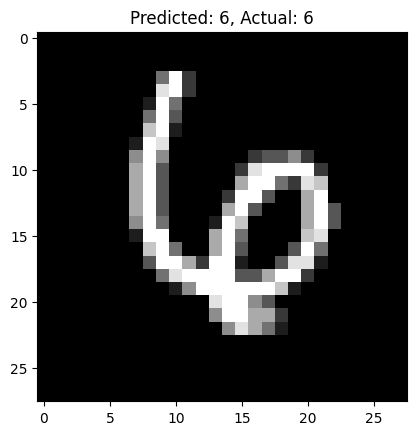

In [32]:
predictions = model.predict(x_test)

print(predictions)
# Show a sample prediction
sample_index = 22

plt.imshow(x_test[sample_index], cmap='gray')
plt.title(f"Predicted: {tf.argmax(predictions[sample_index])}, Actual: {tf.argmax(y_test[sample_index])}")
plt.show()
